In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

# Performance of a Neural Network versus performance of a Variational Quantum Circuit

In [48]:

nn2020skolik_path = "../../results/nn_final/nn2020_skolik"
skolik_datareup_path = "../../results/thesis/1.1/skolik_datareup"
nn_target_path = "../../results/nn_final/nn2020_skolik_target"

nn2020skolik = Analysis(nn2020skolik_path)
skolik_datareup = Analysis(skolik_datareup_path)
nn_target = Analysis(nn_target_path)


In [49]:

nn2020skolik_reward = nn2020skolik.get_rewards()
skolik_datareup_reward = skolik_datareup.get_rewards()
nn_target_reward = nn_target.get_rewards()

nn2020skolik_average_reward = np.mean(nn2020skolik_reward, axis=0)
nn2020skolik_std_reward = np.std(nn2020skolik_reward, axis=0)


skolik_datareup_average_reward = np.mean(skolik_datareup_reward, axis=0)
skolik_datareup_std_reward = np.std(skolik_datareup_reward, axis=0)

nn_target_average_reward = np.mean(nn_target_reward, axis=0)
nn_target_std_reward = np.std(nn_target_reward, axis=0)

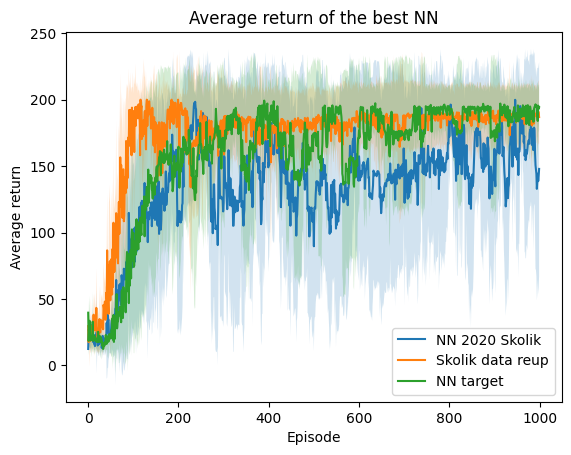

In [50]:
plt.plot(nn2020skolik_average_reward, label="NN 2020 Skolik")
plt.fill_between(np.arange(len(nn2020skolik_average_reward)), nn2020skolik_average_reward - nn2020skolik_std_reward, nn2020skolik_average_reward + nn2020skolik_std_reward, alpha=0.2)
plt.plot(skolik_datareup_average_reward, label="Skolik data reup")
plt.fill_between(np.arange(len(skolik_datareup_average_reward)), skolik_datareup_average_reward - skolik_datareup_std_reward, skolik_datareup_average_reward + skolik_datareup_std_reward, alpha=0.2)
plt.plot(nn_target_average_reward, label="NN target")
plt.fill_between(np.arange(len(nn_target_average_reward)), nn_target_average_reward - nn_target_std_reward, nn_target_average_reward + nn_target_std_reward, alpha=0.2)
plt.title("Average return of the best NN")
plt.xlabel("Episode")
plt.ylabel("Average return")
plt.legend()
plt.show()


# Analysis of the gradients

In [51]:
nn_2020_gradients = nn2020skolik.get_gradients()
skolik_datareup_gradients = skolik_datareup.get_gradients()
nn_target_gradients = nn_target.get_gradients()

In [52]:
nn_2020_flattened_gradients = []
for i in range(len(nn_2020_gradients)):
    aux = []
    for j in range(len(nn_2020_gradients[i])):
        flattened_arrays = [arr.flatten() for arr in nn_2020_gradients[i][j]]
        aux.append(np.concatenate(flattened_arrays))
    nn_2020_flattened_gradients.append(aux)

skolik_datareup_flattened_gradients = []
for i in range(len(skolik_datareup_gradients)):
    aux = []
    for j in range(len(skolik_datareup_gradients[i])):
        flattened_arrays = [arr.flatten() for arr in skolik_datareup_gradients[i][j]]
        aux.append(np.concatenate(flattened_arrays))
    skolik_datareup_flattened_gradients.append(aux)

nn_target_flattened_gradients = []
for i in range(len(nn_target_gradients)):
    aux = []
    for j in range(len(nn_target_gradients[i])):
        flattened_arrays = [arr.flatten() for arr in nn_target_gradients[i][j]]
        aux.append(np.concatenate(flattened_arrays))
    nn_target_flattened_gradients.append(aux)

In [53]:
nn2020_flattend_gradients_min_len = min([len(arr) for arr in nn_2020_flattened_gradients])
skolik_datareup_flattend_gradients_min_len = min([len(arr) for arr in skolik_datareup_flattened_gradients])
nn_target_flattend_gradients_min_len = min([len(arr) for arr in nn_target_flattened_gradients])

nn_2020_flattened_gradients = [arr[:nn2020_flattend_gradients_min_len] for arr in nn_2020_flattened_gradients]
skolik_datareup_flattened_gradients = [arr[:skolik_datareup_flattend_gradients_min_len] for arr in skolik_datareup_flattened_gradients]
nn_target_flattened_gradients = [arr[:nn_target_flattend_gradients_min_len] for arr in nn_target_flattened_gradients]

nn_2020_flattened_gradients = np.array(nn_2020_flattened_gradients)
skolik_datareup_flattened_gradients = np.array(skolik_datareup_flattened_gradients)
nn_target_flattened_gradients = np.array(nn_target_flattened_gradients)

In [54]:
print(nn_2020_flattened_gradients.shape)
print(skolik_datareup_flattened_gradients.shape)
print(nn_target_flattened_gradients.shape)

(10, 27260, 562)
(10, 34538, 70)
(10, 24667, 562)


In [55]:
nn_20_20_gradient_norms = np.linalg.norm(nn_2020_flattened_gradients, axis=2)
skolik_datareup_gradient_norms = np.linalg.norm(skolik_datareup_flattened_gradients, axis=2)
nn_target_gradient_norms = np.linalg.norm(nn_target_flattened_gradients, axis=2)

In [56]:
nn_2020_mean_gradient_norms = np.mean(nn_20_20_gradient_norms, axis=0)
skolik_datareup_mean_gradient_norms = np.mean(skolik_datareup_gradient_norms, axis=0)
nn_target_mean_gradient_norms = np.mean(nn_target_gradient_norms, axis=0)

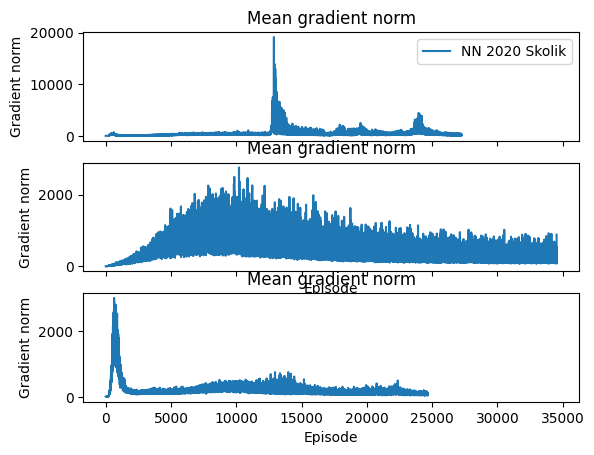

In [57]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(nn_2020_mean_gradient_norms, label="NN 2020 Skolik")
axs[0].set_title("Mean gradient norm")
axs[0].set_ylabel("Gradient norm")
axs[0].legend()

axs[1].plot(skolik_datareup_mean_gradient_norms, label="Skolik data reup")
axs[1].set_title("Mean gradient norm")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Gradient norm")

axs[2].plot(nn_target_mean_gradient_norms, label="NN target")
axs[2].set_title("Mean gradient norm")
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Gradient norm")

plt.show()


Why are the results so different? In other words, why do the gradients of the neural network behave so differently from the gradients of the VQC?

To try and understand the reason, we are going to analyze the gradients of the VQC according to the types of weights

In [13]:
rotational_weights_shape = skolik_datareup_gradients[0][0][0].shape
input_weights_shape = skolik_datareup_gradients[0][0][1].shape
output_weights_shape = skolik_datareup_gradients[0][0][2].shape

print("Rotational weights shape: ", rotational_weights_shape)
print("Input weights shape: ", input_weights_shape)
print("Output weights shape: ", output_weights_shape)

Rotational weights shape:  (1, 48)
Input weights shape:  (20,)
Output weights shape:  (1, 2)


In other words, the first 48 parameters correspond to the rotational weights, the nex 20 parameters correspond to input scaling weights and the last 2 to output scaling weights. Thus, we will analyse how the gradient norm behaves for each of these types of parameters.

In [14]:
skolik_datareup_flatenned_gradients_weights = []
for i in range(len(skolik_datareup_gradients)):
    aux = []
    for j in range(len(skolik_datareup_gradients[i])):
        flattened_arrays = [arr.flatten() for arr in skolik_datareup_gradients[i][j]]
        aux.append(flattened_arrays)
    skolik_datareup_flatenned_gradients_weights.append(aux)

In [15]:
skolik_datareup_flatenned_gradients_weights_min_len = min([len(arr) for arr in skolik_datareup_flatenned_gradients_weights])

skolik_datareup_flatenned_gradients_weights = [arr[:skolik_datareup_flatenned_gradients_weights_min_len] for arr in skolik_datareup_flatenned_gradients_weights]

In [16]:
skolik_datareup_rotational_parameters_gradients = []
skolik_datareup_input_parameters_gradients = []
skolik_datareup_output_parameters_gradients = []

for i in range(len(skolik_datareup_flatenned_gradients_weights)):
    aux_rotational = []
    aux_input = []
    aux_output = []
    for j in range(skolik_datareup_flatenned_gradients_weights_min_len):
        aux_rotational.append(skolik_datareup_flatenned_gradients_weights[i][j][0])
        aux_input.append(skolik_datareup_flatenned_gradients_weights[i][j][1])
        aux_output.append(skolik_datareup_flatenned_gradients_weights[i][j][2])
    skolik_datareup_rotational_parameters_gradients.append(aux_rotational)
    skolik_datareup_input_parameters_gradients.append(aux_input)
    skolik_datareup_output_parameters_gradients.append(aux_output)

In [17]:
skolik_datareup_rotational_parameters_gradients = np.asarray(skolik_datareup_rotational_parameters_gradients)
skolik_datareup_input_parameters_gradients = np.asarray(skolik_datareup_input_parameters_gradients)
skolik_datareup_output_parameters_gradients = np.asarray(skolik_datareup_output_parameters_gradients)

Now each one of these three arrays has shape (10,min_training_steps,number_parameters), so that we can easily calculate what the norm of the gradients is for each type of parameters.

In [18]:
skolik_datareup_rotational_parameters_gradients_norms = np.linalg.norm(skolik_datareup_rotational_parameters_gradients, axis=2)
skolik_datareup_input_parameters_gradients_norms = np.linalg.norm(skolik_datareup_input_parameters_gradients, axis=2)
skolik_datareup_output_parameters_gradients_norms = np.linalg.norm(skolik_datareup_output_parameters_gradients, axis=2)

In [19]:
skolik_datareup_rotational_parameters_gradients_mean_norms = np.mean(skolik_datareup_rotational_parameters_gradients_norms, axis=0)
skolik_datareup_input_parameters_gradients_mean_norms = np.mean(skolik_datareup_input_parameters_gradients_norms, axis=0)
skolik_datareup_output_parameters_gradients_mean_norms = np.mean(skolik_datareup_output_parameters_gradients_norms, axis=0)

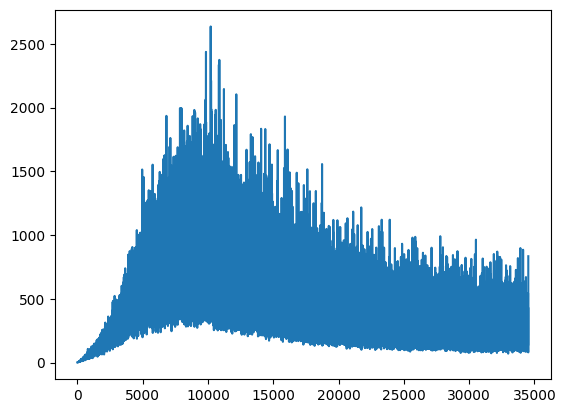

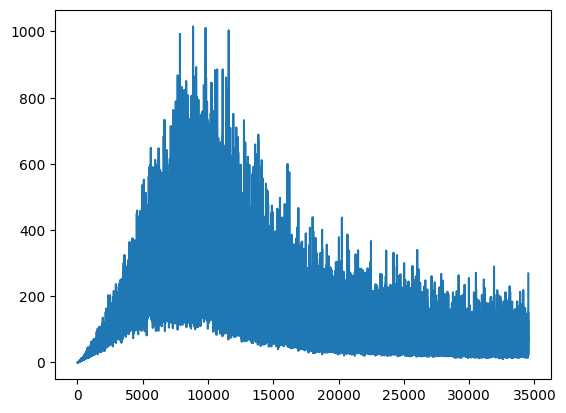

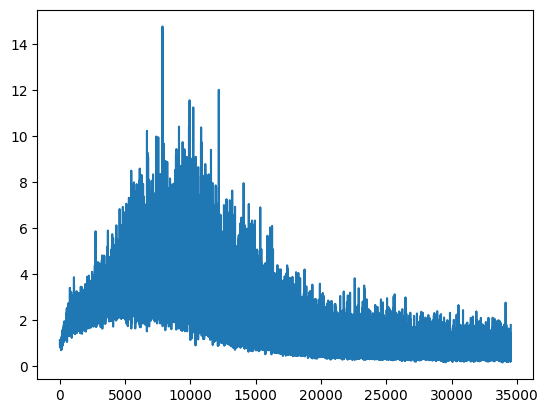

In [20]:
plt.plot(skolik_datareup_rotational_parameters_gradients_mean_norms, label="Rotational parameters")
plt.show()

plt.plot(skolik_datareup_input_parameters_gradients_mean_norms, label="Input parameters")
plt.show()

plt.plot(skolik_datareup_output_parameters_gradients_mean_norms, label="Output parameters")
plt.show()

They all behave similarly and interestingly, the norm of the rotational parameters is the highest of the three types of parameters. This raises even more questions about why the gradients of the neural networks behave as weirdly as they do.

# Loss Function of the Neural Network

Now we will try to look at the loss function of the neural network to try and figure out why the gradients are behaving so weirdly.

In [21]:
nn_loss = nn2020skolik.get_loss()

# Each loss is a list of 5 lists of different training steps, and we need to make them all the same length

min_length_nn_loss = min([len(nn_loss[i]) for i in range(len(nn_loss))])

for i in range(len(nn_loss)):
    nn_loss[i] = nn_loss[i][:min_length_nn_loss]

nn_loss_mean = np.mean(nn_loss, axis=0)

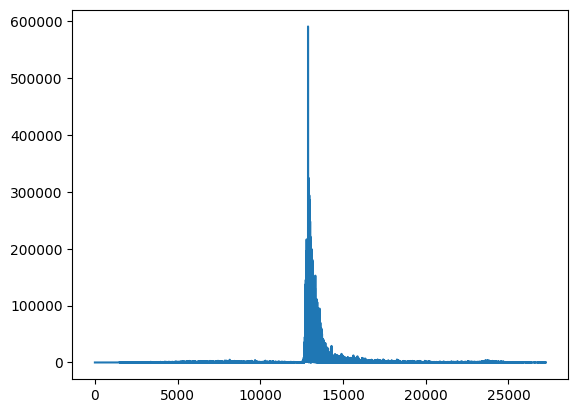

In [33]:
plt.plot(nn_loss[0])

Once again, we see exactly the loss behaves very similarly to the gradients, which is also what we saw happens for the VQCs. Nonetheless, why it behaves like this is still weird